**Name:- Aditya Pawar**

**Class :- A (A1)**

**Roll No:- 04**

**PRN :- 22SC114501004**

**Experiment 3:- Transparency in AI Decision-Making**

In [1]:
# Import Libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Fetch dataset (UCI ID 45 is the Heart Disease dataset)
heart_disease = fetch_ucirepo(id=45)

In [3]:
X = heart_disease.data.features
y = heart_disease.data.targets

In [4]:
X = heart_disease.data.features
y = heart_disease.data.targets

In [5]:
df = pd.concat([X, y], axis=1)
df.columns = df.columns.str.strip()

In [6]:
print("\nDataset shape:", df.shape)
print(df.head())


Dataset shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


C:\Users\adity\AppData\Local\Temp\ipykernel_18448\3490550923.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.columns[-1], data=df, palette='Set2')


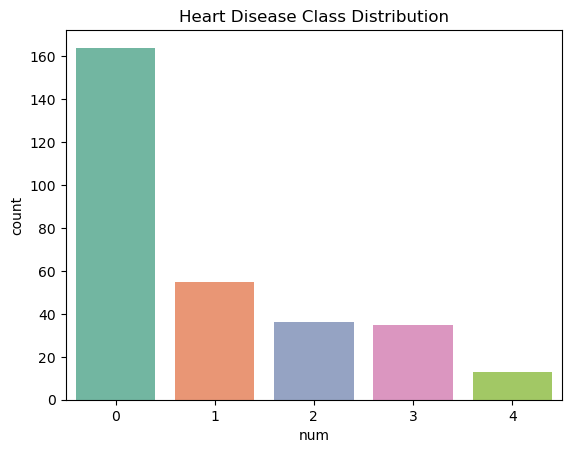

In [7]:
sns.countplot(x=df.columns[-1], data=df, palette='Set2')
plt.title("Heart Disease Class Distribution")
plt.show()

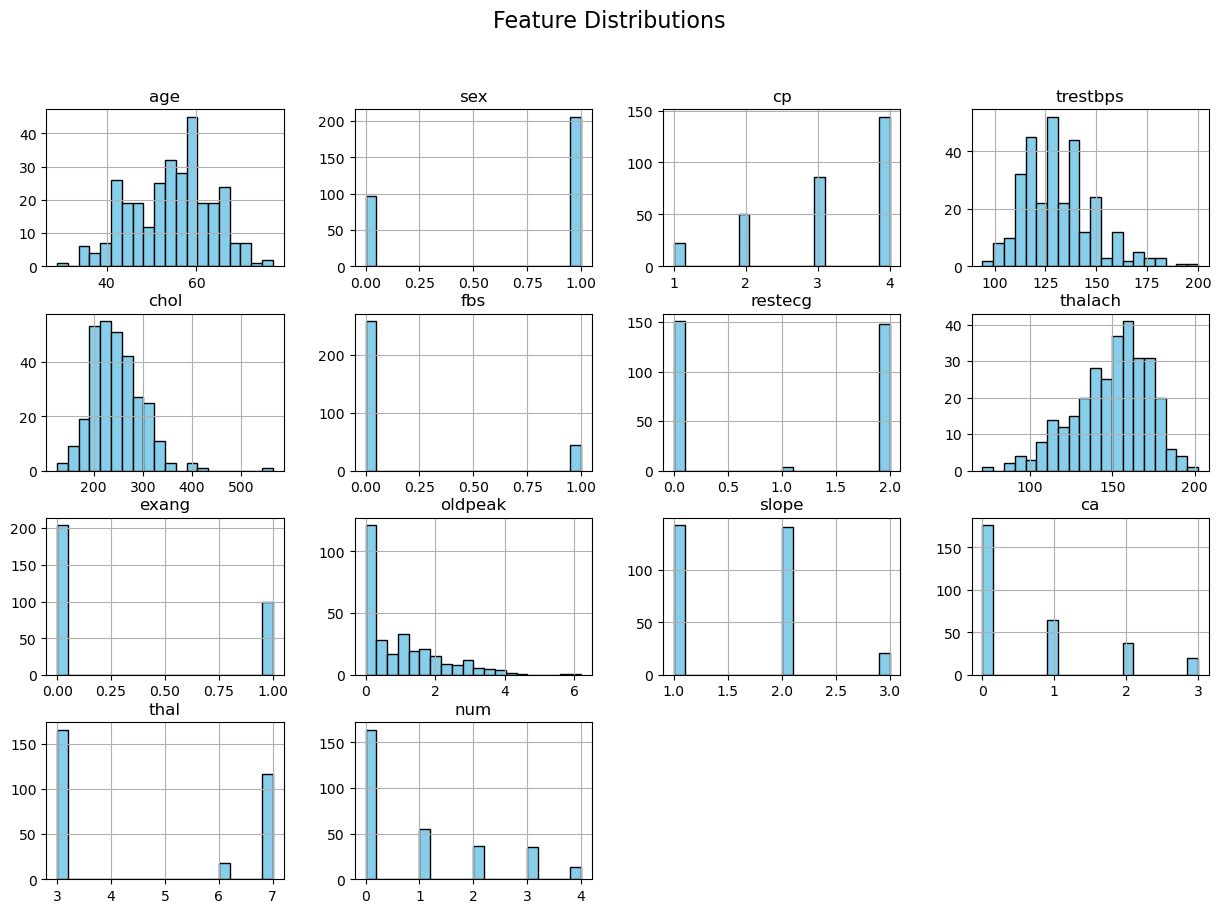

In [8]:
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


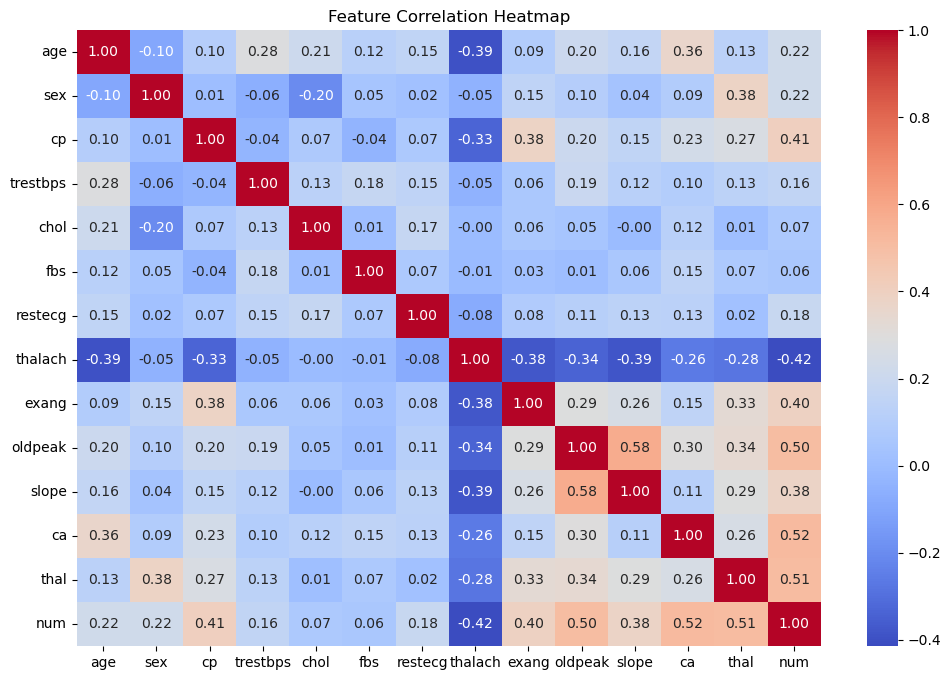

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# Split Data
target_col = df.columns[-1]  # last column is the target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [11]:
# Train Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [12]:
# Evaluate Decision Tree
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

c:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [13]:
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Random Forest Report:\n", classification_report(y_test, y_pred_forest))


Decision Tree Accuracy: 0.5384615384615384
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        48
           1       0.24      0.24      0.24        17
           2       0.20      0.17      0.18        12
           3       0.36      0.50      0.42        10
           4       0.00      0.00      0.00         4

    accuracy                           0.54        91
   macro avg       0.31      0.34      0.32        91
weighted avg       0.51      0.54      0.52        91


Random Forest Accuracy: 0.5494505494505495
Random Forest Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        48
           1       0.18      0.18      0.18        17
           2       0.22      0.17      0.19        12
           3       0.12      0.10      0.11        10
           4       0.00      0.00      0.00         4

    accuracy                           0.55        

c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adity\anaconda3\Lib\site-packag

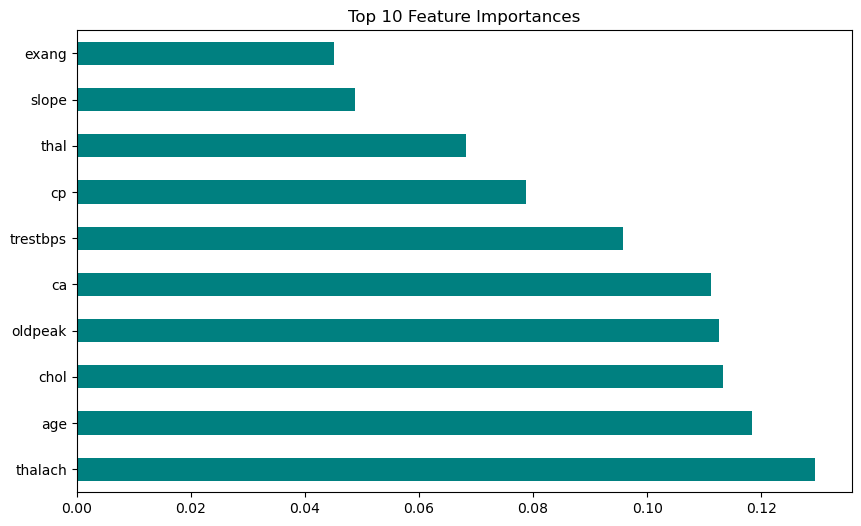

In [14]:
plt.figure(figsize=(10, 6))
pd.Series(forest.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances")
plt.show()


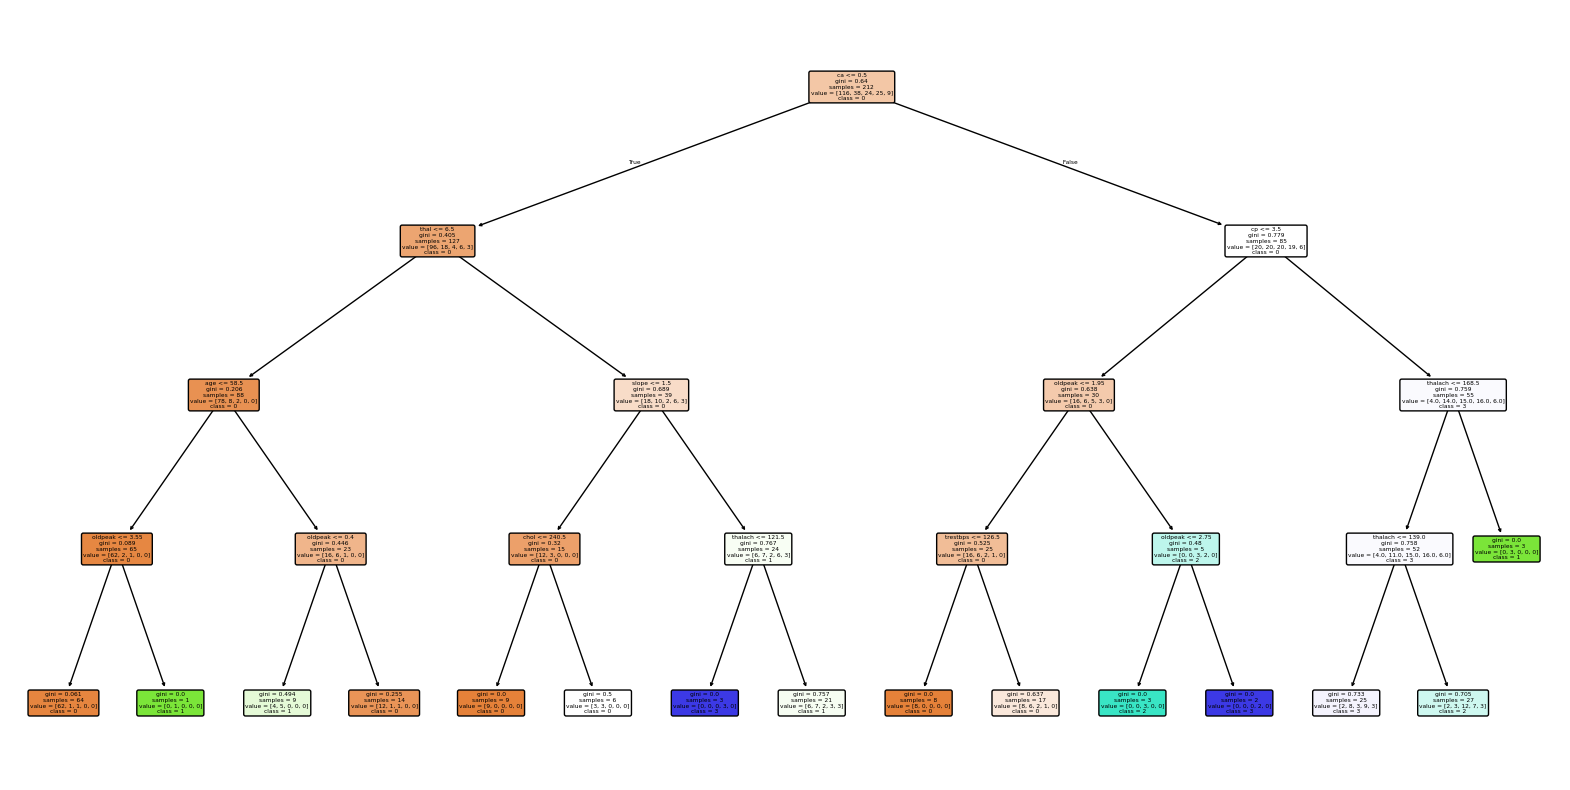

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=[str(cls) for cls in sorted(df['num'].unique())],
    filled=True,
    rounded=True
)
plt.show()

**Conclusion**

In this experiment, we replaced the Breast Cancer dataset with the UCI Heart Disease dataset to evaluate the trade-off between model transparency and predictive performance.

The Decision Tree model provided a clear and interpretable structure, allowing us to trace individual predictions through its nodes. This transparency makes it valuable in healthcare applications where explainability is critical, even though its accuracy was slightly lower compared to the black-box model.

The Random Forest model delivered higher accuracy and better overall classification metrics due to its ensemble approach, which reduces variance and overfitting. However, its complex structure of multiple decision trees makes it difficult to interpret, posing challenges in scenarios where decision justification is required.

EDA revealed meaningful correlations between certain features (e.g., chest pain type, maximum heart rate, and exercise-induced angina) and heart disease presence, which aligned with known medical insights.

**Final takeaway:**

    .Decision Tree → Best for interpretability and stakeholder trust.

    .Random Forest → Best for predictive performance, but less interpretable.

    .In healthcare, a balance between accuracy and explainability should guide model selection, and model-agnostic explainability tools (e.g., SHAP, LIME) can help bridge this gap.